<a href="https://colab.research.google.com/github/pragmatic-philosopher09/Feynn-Labs-Market-Segmentation-Internship-Task-/blob/main/Feynn_Lab_Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [ ]:
bp=pd.read_csv("cardio_train.csv",sep=";")
bp.head()

FileNotFoundError: ignored

In [ ]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
#Checking NULL Values
bp.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

####**The data set shows there is no null values** 

In [ ]:
bp.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


From an initial statistical overview of the dataset, we infer that some data features are binary or ordinal, whereas other features are continuous. Further, the minimum and maximum values for some features, notably for systolic and diastolic blood pressure (ap_hi and ap_lo), are unrealistic. This suggests the presence of outliers in the data.



In [ ]:
# check distribution of target variable
bp.cardio.value_counts()


0    35021
1    34979
Name: cardio, dtype: int64

35,021 out of 70,000 cases in this dataset are labelled as having no cardiovascular disease, and 34,979 cases are labelled as having cardiovascular disease. This suggests that the dataset is balanced.



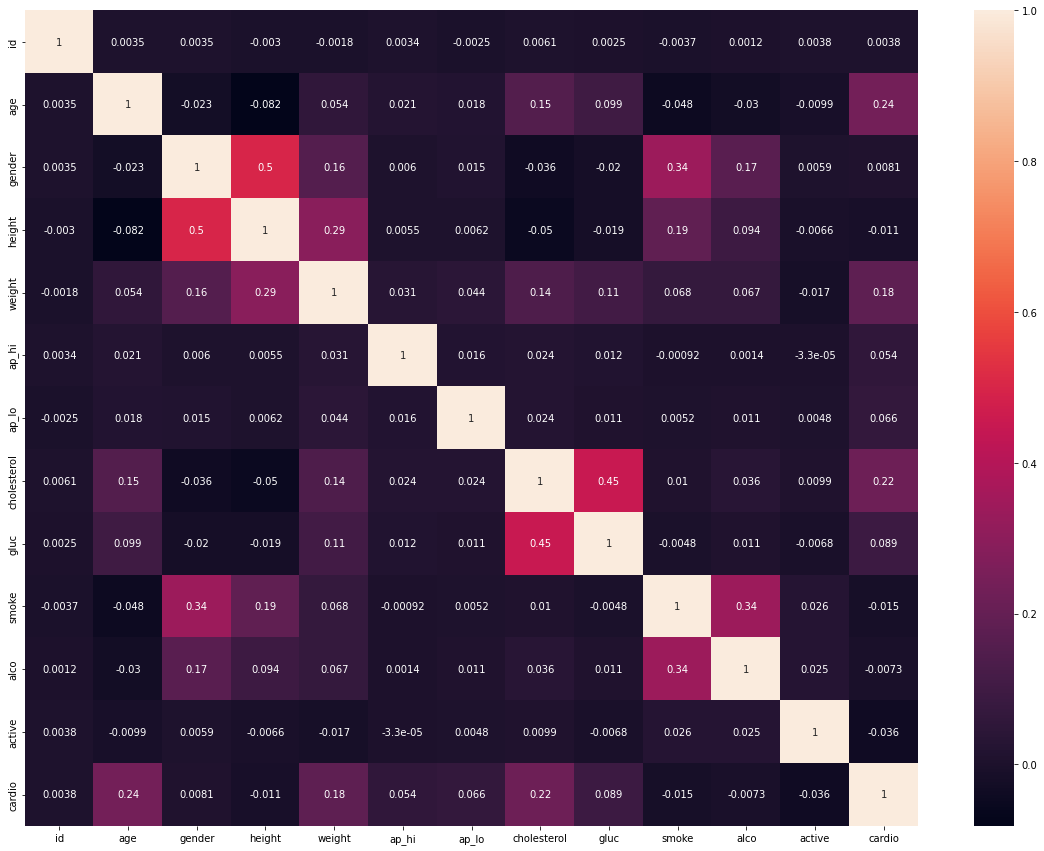

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(bp.corr(), annot=True)


A heatmap shows correlations between variables in the dataset. From the above heatmap, we see that no features directly correlate with the label (cardio) and that generally, there do not exist significant correlations between other variables. However, correlations exist between a select few variables:

Height and gender are correlated with a score of 0.5.
Glucose and cholesterol are correlated with a score of 0.45.
Smoking habits and gender are correlated with a score of 0.34.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

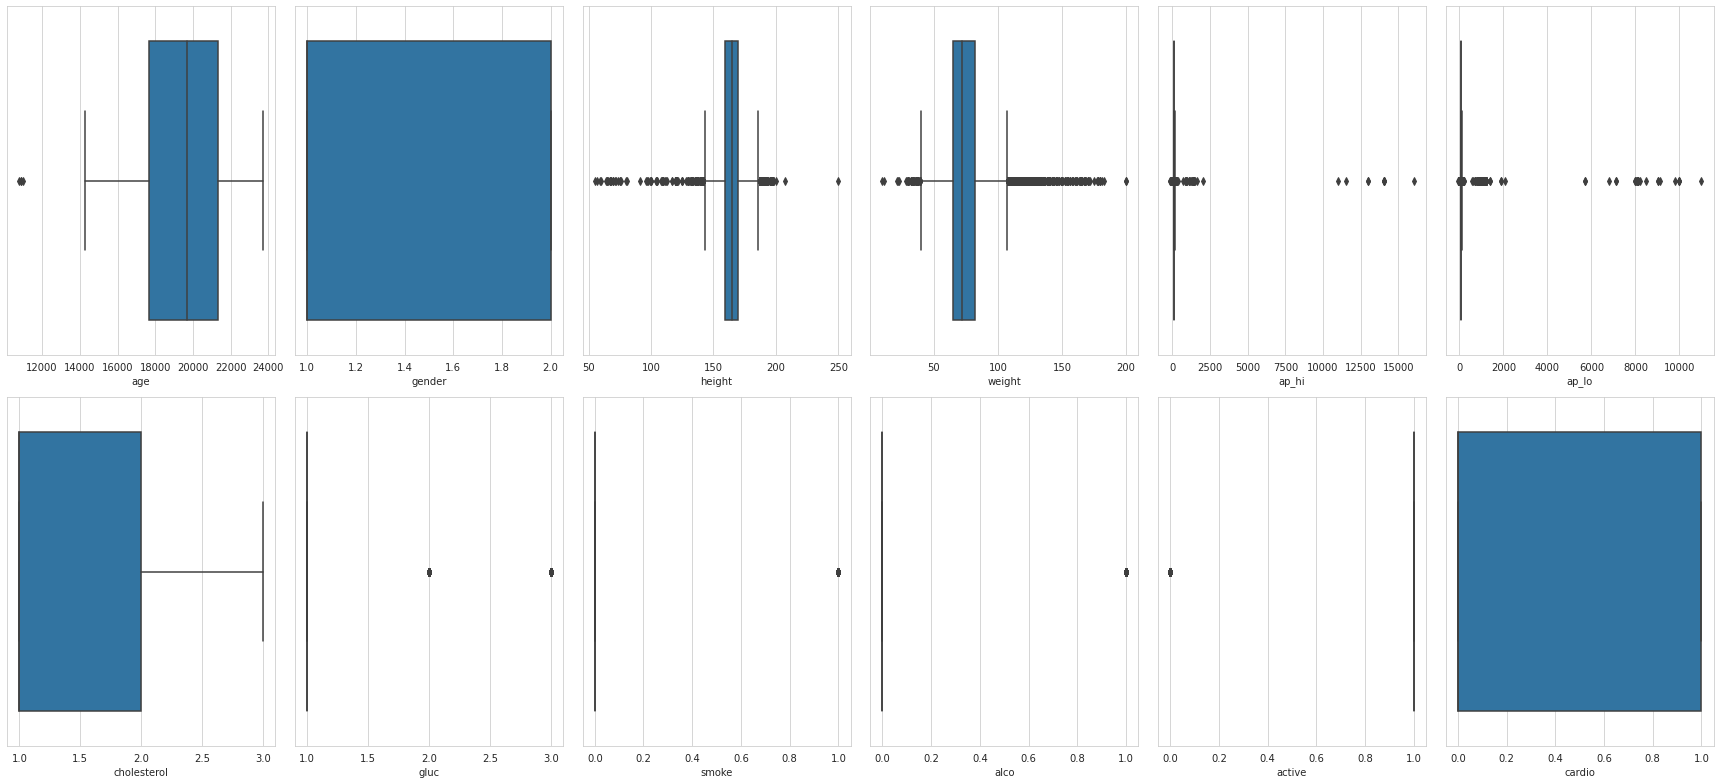

In [ ]:
# check outliers

def check_outliers(bp):
    l = bp.columns.values
    number_of_columns=(len(l)-1)/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows + 1,number_of_columns,i)
        sns.set_style('whitegrid')
        sns.boxplot(bp[l[i]],orient='v')
        plt.tight_layout()
        
check_outliers(bp)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

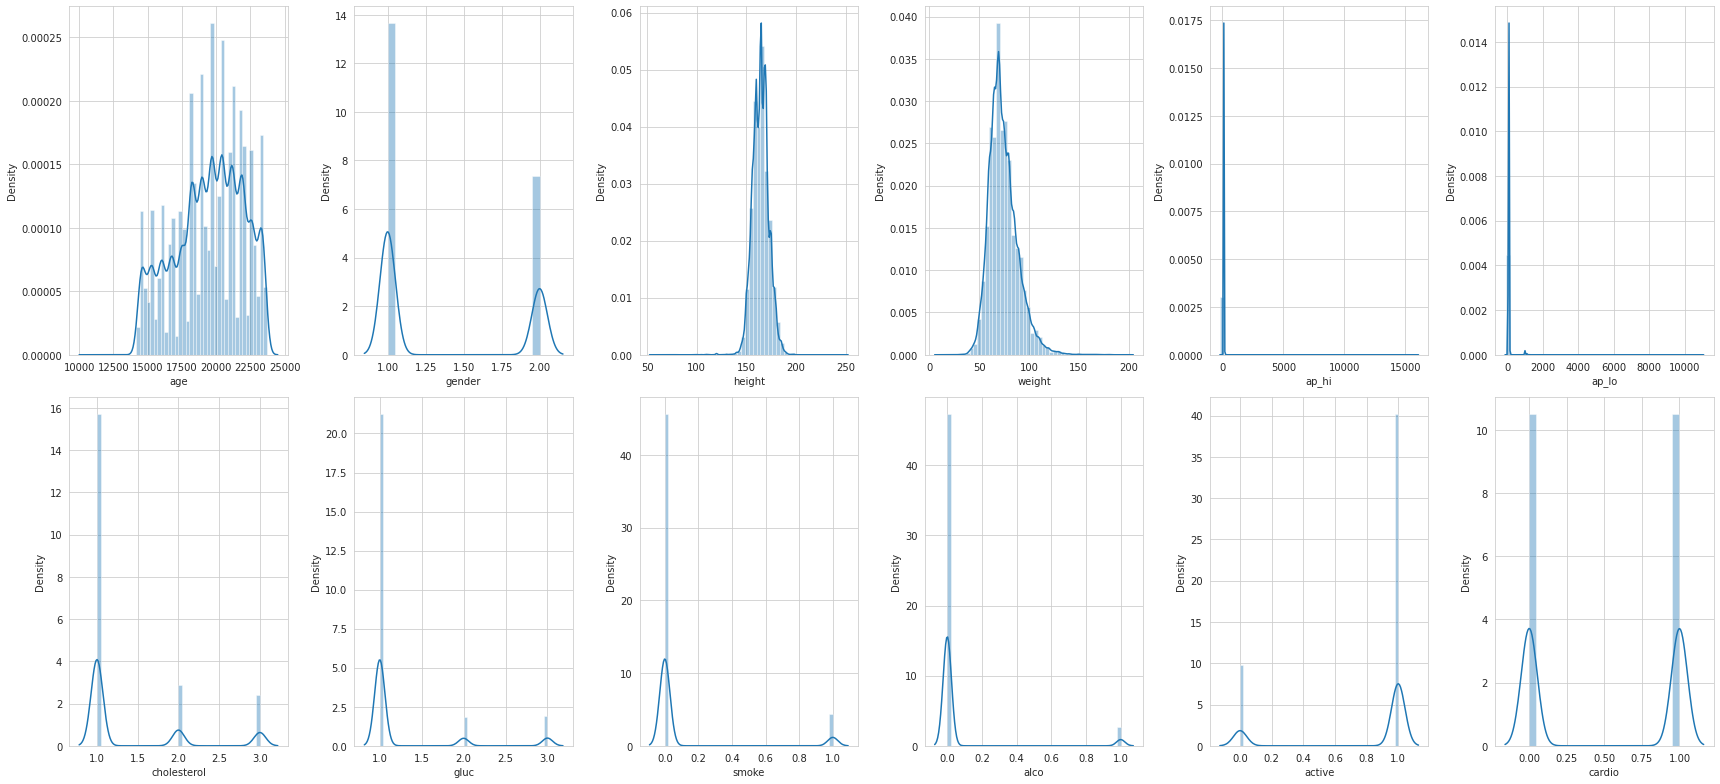

In [ ]:
# check distribution and skew
def check_dist(bp):
    l = bp.columns.values
    number_of_columns=(len(l)-1)/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows+1,number_of_columns,i)
        sns.distplot(bp[l[i]],kde=True) 
        plt.tight_layout()
        
check_dist(bp)


The above graphs shows that there are many outliers at ap_hi and ap_lo so we should remove that

In [ ]:
# remove outliers in ap_hi and ap_lo
cleaned_df = bp[bp['ap_hi'] < 250]  
cleaned_df = cleaned_df[cleaned_df['ap_lo'] < 250] 

print(cleaned_df.shape)


(69007, 13)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

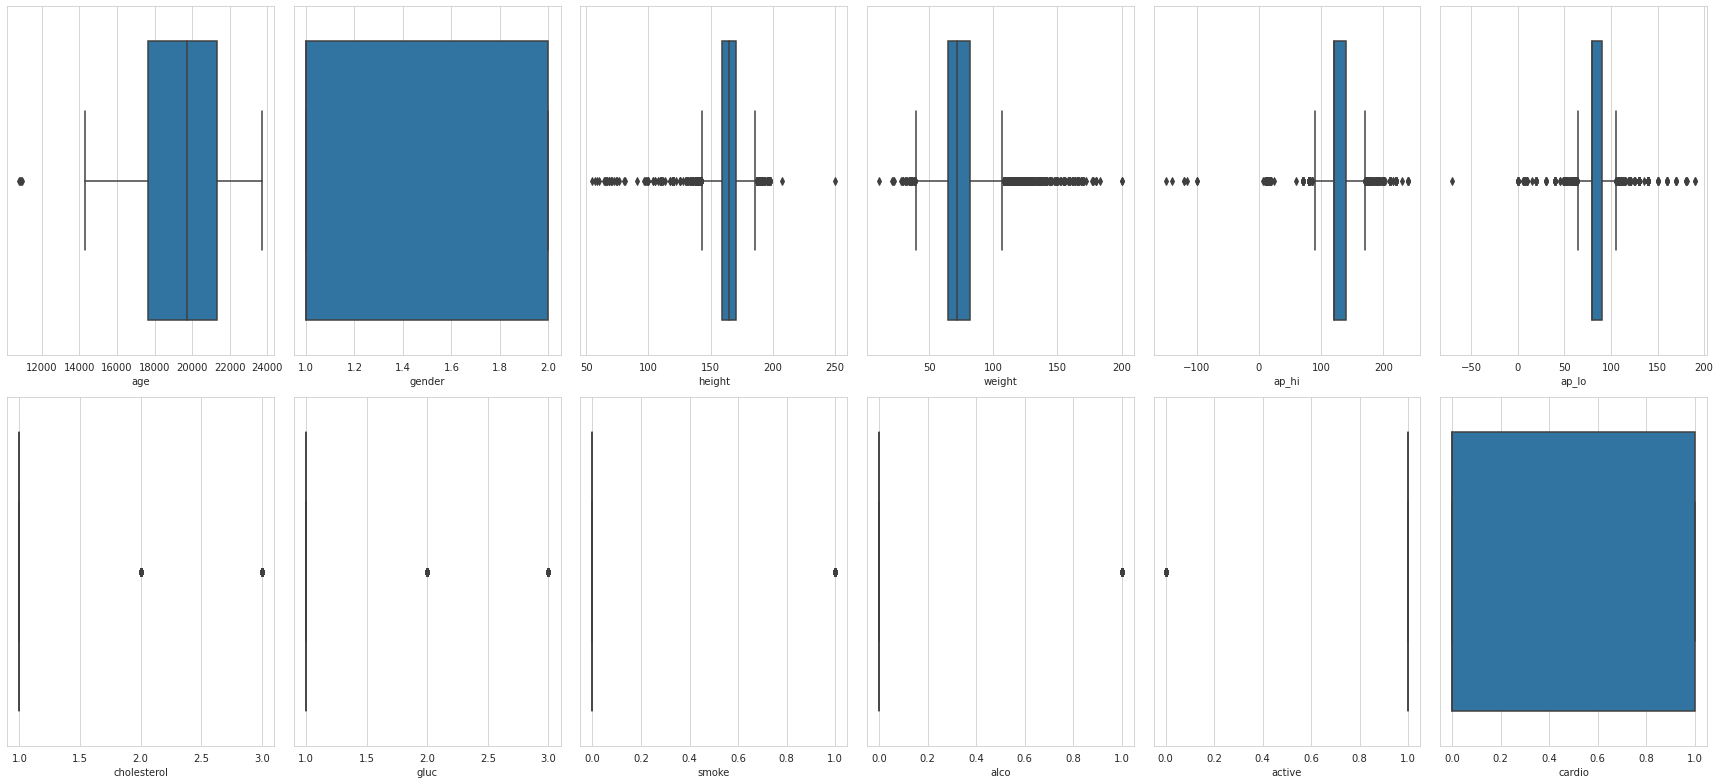

In [ ]:
check_outliers(cleaned_df)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

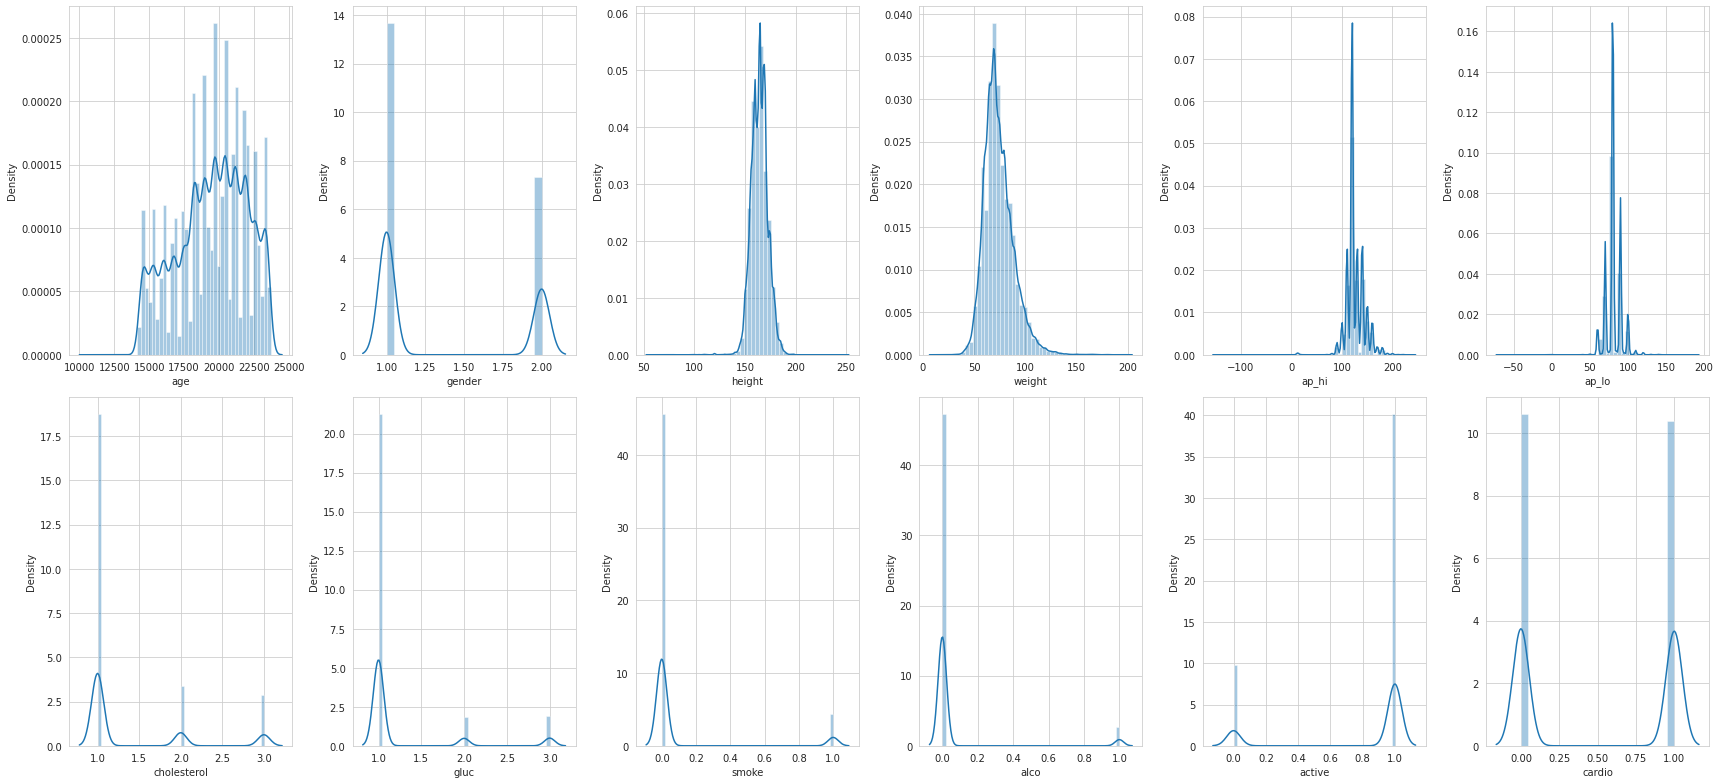

In [ ]:
check_dist(cleaned_df)


In [ ]:
cont_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
ord_cols = ['cholesterol', 'gluc']
bin_cols = ['gender', 'smoke', 'alco', 'active', 'cardio']

# create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# create an object to transform the data to fit minmax processor
bp_scaled = min_max_scaler.fit_transform(cleaned_df[cont_cols])

# run the normalizer on the dataframe
bp_normalized = pd.DataFrame(bp_scaled)
bp_normalized.columns = cont_cols
bp_normalized.head()


,age,height,weight,ap_hi,ap_lo
0,0.588076,0.579487,0.269841,0.666667,0.576923
1,0.730159,0.517949,0.391534,0.743590,0.615385
2,0.624003,0.564103,0.280423,0.717949,0.538462
3,0.528455,0.584615,0.375661,0.769231,0.653846
4,0.516918,0.517949,0.238095,0.641026,0.500000


In [ ]:
for col in ord_cols:
    dummies = pd.get_dummies(cleaned_df[col])
    min_ind = min([ind for ind in dummies.columns])
    dummies.columns = ['{0}_{1}'.format(col, ind) for ind in dummies.columns]
    bp_normalized = pd.concat([bp_normalized, dummies.drop(['{0}_{1}'.format(col, min_ind)], axis=1)], axis=1)

    
bp_normalized.head()


,age,height,weight,ap_hi,ap_lo,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,0.588076,0.579487,0.269841,0.666667,0.576923,0.0,0.0,0.0,0.0
1,0.730159,0.517949,0.391534,0.743590,0.615385,0.0,1.0,0.0,0.0
2,0.624003,0.564103,0.280423,0.717949,0.538462,0.0,1.0,0.0,0.0
3,0.528455,0.584615,0.375661,0.769231,0.653846,0.0,0.0,0.0,0.0
4,0.516918,0.517949,0.238095,0.641026,0.500000,0.0,0.0,0.0,0.0


In [ ]:
df_normalized = pd.concat([bp_normalized, cleaned_df[bin_cols]], axis=1)
df_normalized['gender'] -= 1  # shift the categorical labels for gender to be either 0 or 1

df_normalized.head()


,age,height,weight,ap_hi,ap_lo,cholesterol_2,cholesterol_3,gluc_2,gluc_3,gender,smoke,alco,active,cardio
0,0.588076,0.579487,0.269841,0.666667,0.576923,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.730159,0.517949,0.391534,0.743590,0.615385,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.624003,0.564103,0.280423,0.717949,0.538462,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.528455,0.584615,0.375661,0.769231,0.653846,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.516918,0.517949,0.238095,0.641026,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_normalized.to_csv('cardio_cleaned.csv', index=False)


# **Segmentation & Analysis of Diabetes Market**

## **Exploratory Data Analysis & Data Cleaning**

In [5]:
dia=pd.read_csv("diabetes.csv")
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
## Checking For Null Values

dia.isnull().values.any()

False

#### So, it means that there aren't any null values.

In [7]:
# Descriptive Stats

dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Following inferences can be drawn:

1. Min. value of many var is 0.
2. Biological parameters can't have value as 0, but there are still many that have this, maybe NaN values have been hardcoded to circumvent.

In [8]:
# Checking Zero Values & Displaying Sum Of Such Values In All Columns

(dia.Pregnancies == 0).sum(),(dia.Glucose==0).sum(),(dia.BloodPressure==0).sum(),(dia.SkinThickness==0).sum(),(dia.Insulin==0).sum(),(dia.BMI==0).sum(),(dia.DiabetesPedigreeFunction==0).sum(),(dia.Age==0).sum()

(111, 5, 35, 227, 374, 11, 0, 0)

In [9]:
drop_Glu=dia.index[dia.Glucose == 0].tolist()
drop_BP=dia.index[dia.BloodPressure == 0].tolist()
drop_Skin = dia.index[dia.SkinThickness==0].tolist()
drop_Ins = dia.index[dia.Insulin==0].tolist()
drop_BMI = dia.index[dia.BMI==0].tolist()
c=drop_Glu+drop_BP+drop_Skin+drop_Ins+drop_BMI
dia=dia.drop(dia.index[c])

#### Zeroes were dropped, and dataset is cleaner than before!

In [10]:
dia1 = dia[dia.Outcome==1]
dia0 = dia[dia.Outcome==0]

In [11]:
dia1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
732,2,174,88,37,120,44.5,0.646,24,1
740,11,120,80,37,150,42.3,0.785,48,1
748,3,187,70,22,200,36.4,0.408,36,1
753,0,181,88,44,510,43.3,0.222,26,1


#### Main dataframe has been bifurcated into two more dataframes, showing positive and negative results of having contracted diabetes mellitus.

Text(0.5, 1.0, 'Count Plot for Outcome')

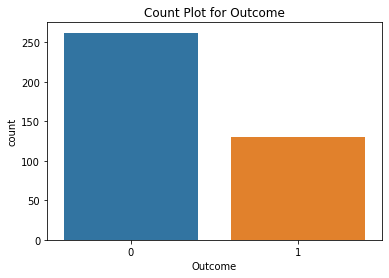

In [12]:
# Plotting Count Of Such Persons Who Might Be Afflicted With Diabetes

sns.countplot(x=dia.Outcome)
plt.title("Count Plot for Outcome")

In [13]:
# Calculating the % of diabetic and non-diabetic in the sample

Out0=len(dia[dia.Outcome==1])
Out1=len(dia[dia.Outcome==0])
Total=Out0+Out1
PC_of_1 = Out1*100/Total
PC_of_0 = Out0*100/Total
PC_of_1, PC_of_0

(66.83673469387755, 33.16326530612245)

#### Thus, we can see that 66.837% of patients are diabetic in the sample dataset taken from a random sample of people, which indicates that people are more likely to have diabetes, making exploration in providing medicinal recourse a lucrative endeavour.

#### Now, we'll begin screening all the biological parameters given in the dataset one-by-one.

## Pregnancies:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Boxplot for Preg by Outcome')

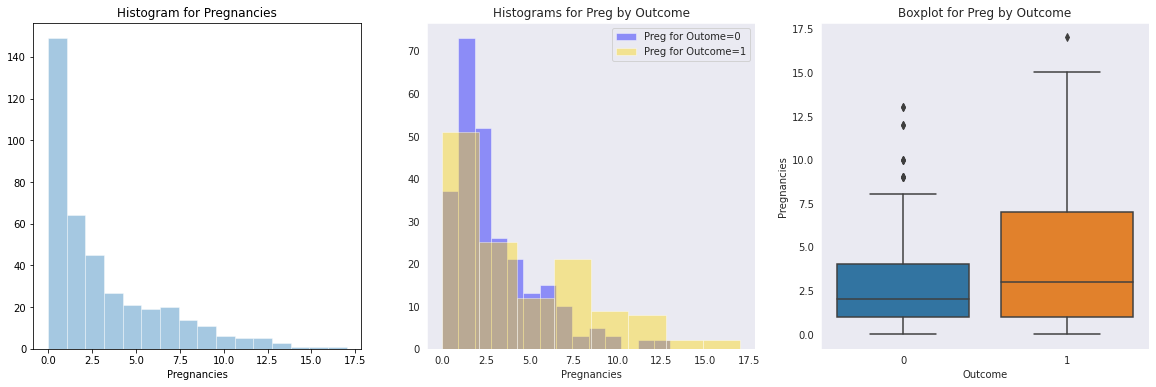

In [14]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Pregnancies")
sns.distplot(dia.Pregnancies,kde=False)
plt.subplot(1,3,2)
sns.distplot(dia0.Pregnancies,kde=False,color="Blue", label="Preg for Outome=0")
sns.distplot(dia1.Pregnancies,kde=False,color = "Gold", label = "Preg for Outcome=1")
plt.title("Histograms for Preg by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.Pregnancies)
plt.title("Boxplot for Preg by Outcome")

#### 1. Data appears to be visually right-skewed.
#### 2. There are many women who are not pregnant, and since, the dataset has women aged over 21 years, it might be an important observation that **many of them are unmarried**.

#### 3. Segmented histogram reveals that pregnant women are indeed more likely to be diabetic, hence they constitute an important segment for diabetes therapeutic market.

#### 4. Boxplots have been used for plotting outliers, revealing some non-diabetic women who have had high number of pregnancies, but this doesn't say the reverse observation is false.



## Glucose Levels

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Boxplot for Glucose by Outcome')

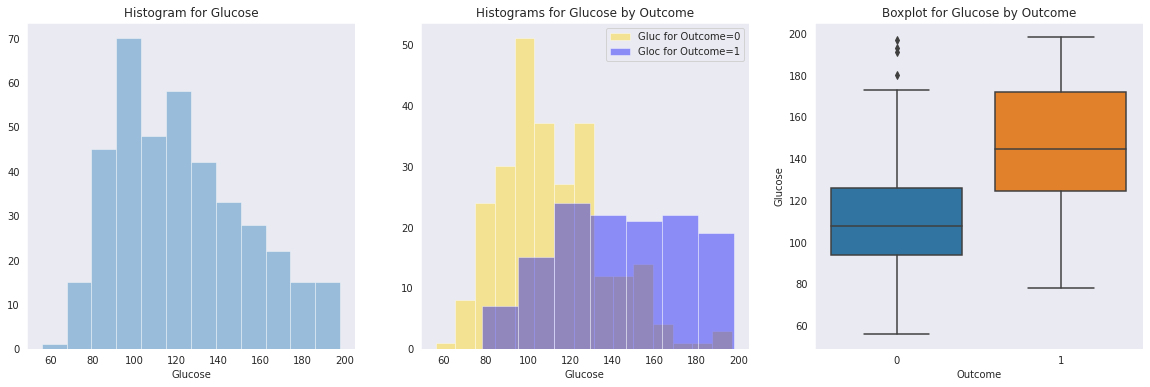

In [15]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.title("Histogram for Glucose")
sns.distplot(dia.Glucose, kde=False)
plt.subplot(1,3,2)
sns.distplot(dia0.Glucose,kde=False,color="Gold", label="Gluc for Outcome=0")
sns.distplot(dia1.Glucose, kde=False, color="Blue", label = "Gloc for Outcome=1")
plt.title("Histograms for Glucose by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.Glucose)
plt.title("Boxplot for Glucose by Outcome")

#### All these graphical representations are important indicators that blood glucose level is an important factor affecting the positivity rate of diabetes. For instance:

#### 1. Data is slightly skewed to the right in 1st graph, showing high rate of glucose level. We already know that more than 60% people surveyed have diabetes, so it means that high blood glucose can lead to higher chance of diabetes.

#### 2. The second and third graph clearly establish that diabetic persons have overwhelmingly greater blood glucose than non-diabetic ones, and visual skewness is also acceptable.

## Blood Pressure:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Boxplot of BP by Outcome')

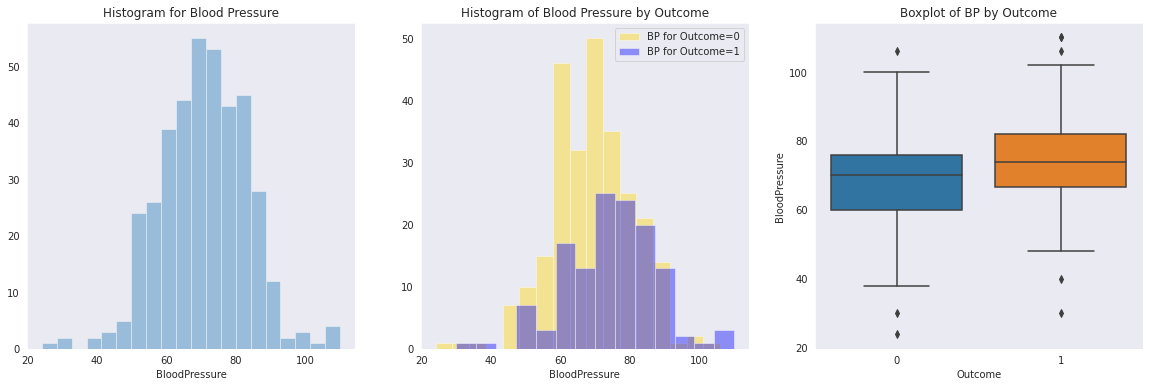

In [16]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.BloodPressure, kde=False)
plt.title("Histogram for Blood Pressure")
plt.subplot(1,3,2)
sns.distplot(dia0.BloodPressure,kde=False,color="Gold",label="BP for Outcome=0")
sns.distplot(dia1.BloodPressure,kde=False, color="Blue", label="BP for Outcome=1")
plt.legend()
plt.title("Histogram of Blood Pressure by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.BloodPressure)
plt.title("Boxplot of BP by Outcome")

#### 1. Distribution appears to be conventional, well within the normal diastolic (lower) limit of 80.

#### 2. Non-diabetic women have normal, whereas, diabetic women have higher BP.

#### 3. There are certain outliers. So, we can't clearly determine relationship between BP and diabetes, it needs to be statistically examined.

## Skin Thickness:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Boxplot of SkinThickness by Outcome')

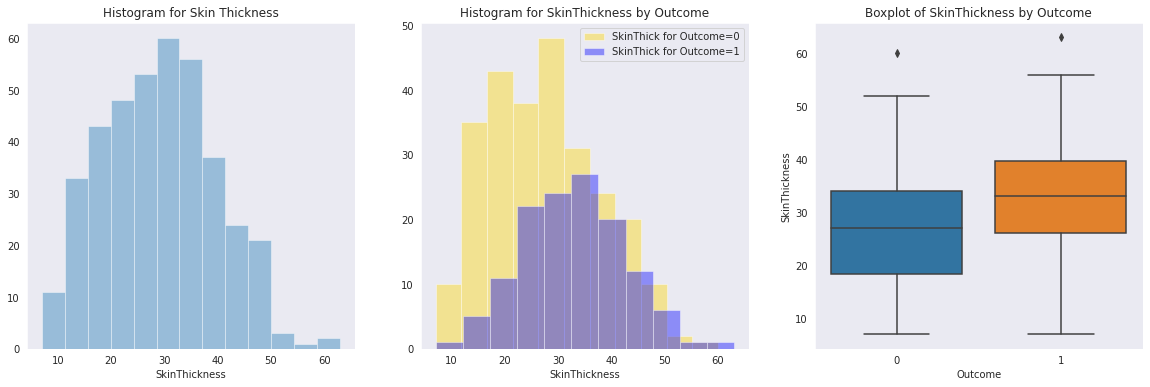

In [17]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.SkinThickness, kde=False)
plt.title("Histogram for Skin Thickness")
plt.subplot(1,3,2)
sns.distplot(dia0.SkinThickness, kde=False, color="Gold", label="SkinThick for Outcome=0")
sns.distplot(dia1.SkinThickness, kde=False, color="Blue", label="SkinThick for Outcome=1")
plt.legend()
plt.title("Histogram for SkinThickness by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dia.SkinThickness)
plt.title("Boxplot of SkinThickness by Outcome")

#### 1. First graph is a bit visually skewed.

#### 2. Second graph reveals that lower skin thickness patients have lesser chance of having diabetes, but this needs validation, as data for non-diabetic is skewed, whereas for diabetic samples seems normal.

## Insulin:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Boxplot for Insulin by Outcome')

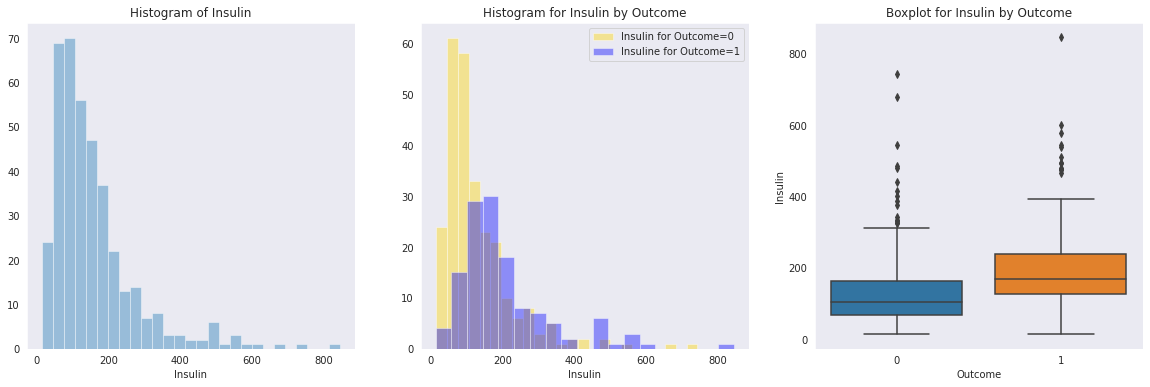

In [18]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.Insulin,kde=False)
plt.title("Histogram of Insulin")
plt.subplot(1,3,2)
sns.distplot(dia0.Insulin,kde=False, color="Gold", label="Insulin for Outcome=0")
sns.distplot(dia1.Insulin,kde=False, color="Blue", label="Insuline for Outcome=1")
plt.title("Histogram for Insulin by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dia.Insulin)
plt.title("Boxplot for Insulin by Outcome")

#### Serum insulin within a specified duration of 2 hours should be between 16 to 166. But there seem to be some outliers in the data, which need to be inspected duly.

## BMI (Body Mass Index):

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Boxplot for BMI by Outcome')

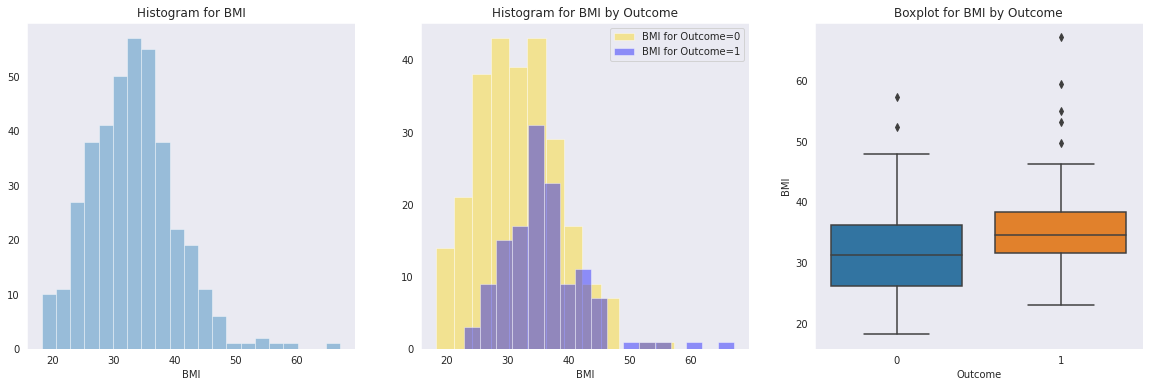

In [19]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.BMI, kde=False)
plt.title("Histogram for BMI")
plt.subplot(1,3,2)
sns.distplot(dia0.BMI, kde=False,color="Gold", label="BMI for Outcome=0")
sns.distplot(dia1.BMI, kde=False, color="Blue", label="BMI for Outcome=1")
plt.legend()
plt.title("Histogram for BMI by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dia.BMI)
plt.title("Boxplot for BMI by Outcome")

#### 1. Certain outliers are there in the data as there're few obese people.

#### 2. People with higher BMI are more likely to have diabetes.

## Diabetes Pedigree Function:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Boxplot for DiabetesPedigreeFunction by Outcome')

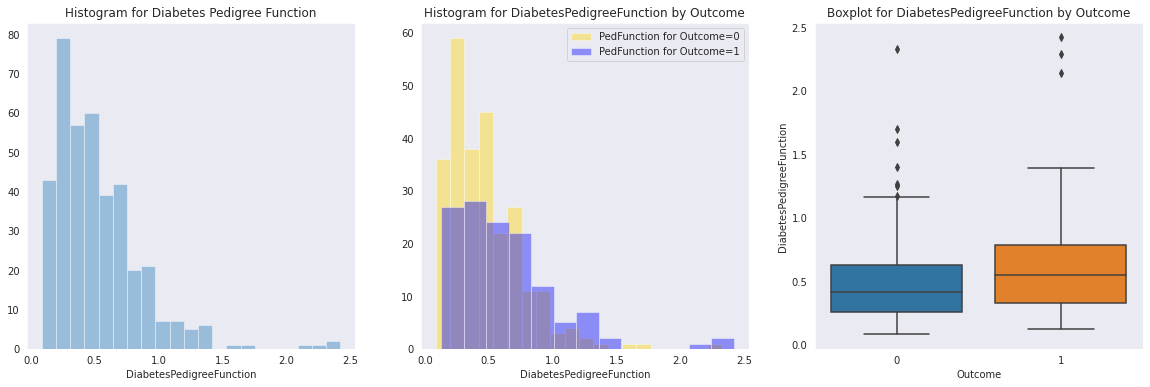

In [20]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.DiabetesPedigreeFunction,kde=False)
plt.title("Histogram for Diabetes Pedigree Function")
plt.subplot(1,3,2)
sns.distplot(dia0.DiabetesPedigreeFunction, kde=False, color="Gold", label="PedFunction for Outcome=0")
sns.distplot(dia1.DiabetesPedigreeFunction, kde=False, color="Blue", label="PedFunction for Outcome=1")
plt.legend()
plt.title("Histogram for DiabetesPedigreeFunction by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dia.DiabetesPedigreeFunction)
plt.title("Boxplot for DiabetesPedigreeFunction by Outcome")

#### 1. This function doesn't explicitly seem to be a significant contributing factor.

#### 2. Data is skewed, and likelihood of being diabetic increases with its increase. 

## Age:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Boxplot for Age by Outcome')

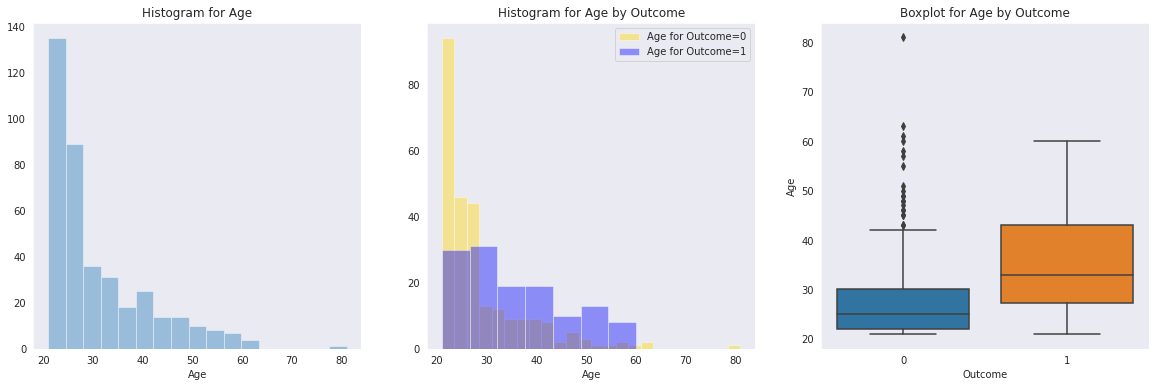

In [21]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.Age,kde=False)
plt.title("Histogram for Age")
plt.subplot(1,3,2)
sns.distplot(dia0.Age,kde=False,color="Gold", label="Age for Outcome=0")
sns.distplot(dia1.Age,kde=False, color="Blue", label="Age for Outcome=1")
plt.legend()
plt.title("Histogram for Age by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.Age)
plt.title("Boxplot for Age by Outcome")

#### 1. Appears to be skewed, but since, it is life data, it is not probable to fall into the category of Weibull distribution but rather seems to fall in normal distribution.

#### 2. As people start aging, they have a greater tendency to become diabetic.

## Using Correlation Coefficients & Heatmap For Final Validation:

In [22]:
cor = dia.corr(method ='pearson')
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


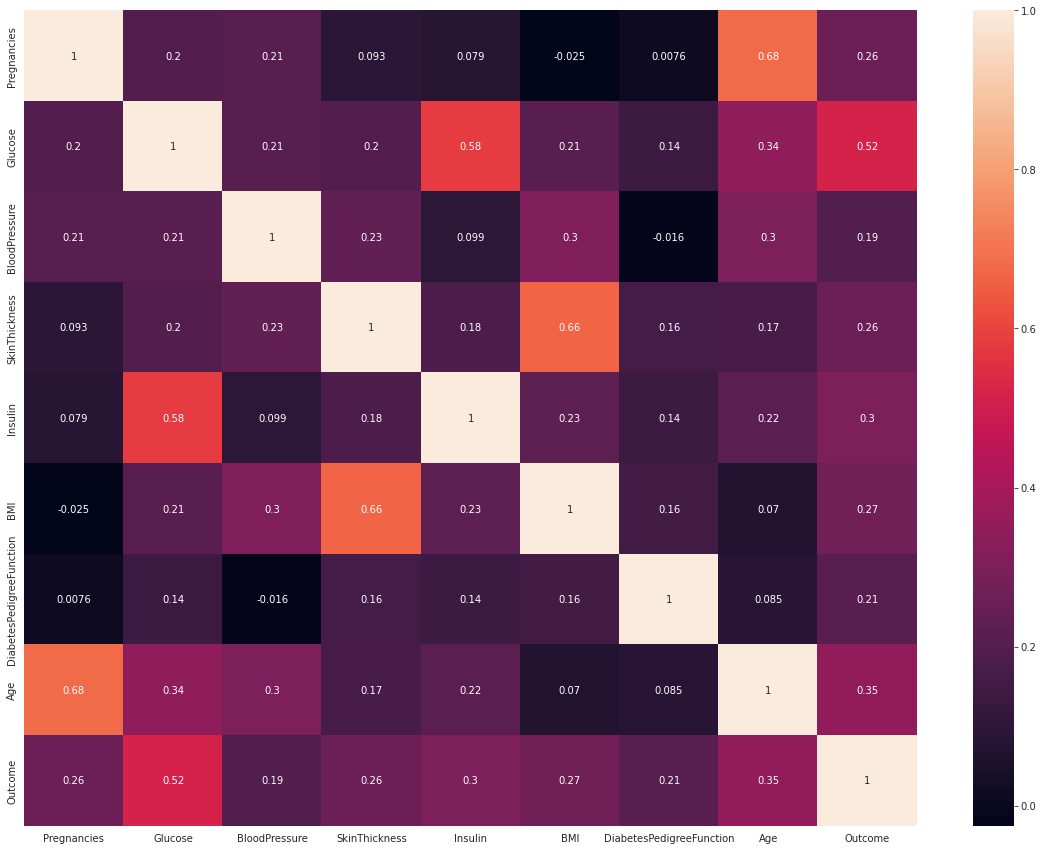

In [23]:
plt.subplots(figsize=(20,15))
sns.heatmap(cor, annot=True)

#### 1. No bivariate paramets have strong linear relationships.

#### 2. It is found that "Age" & "Pregnancies" "BMI" & "Skin Thickness" seem to share a moderate positive linear relationship, respectively.

#### 3. Although, technically speaking, "Glucose" & "Insulin" have low correlation, it is 0.58, which can be approximated to 0.6 for moderate correlation.

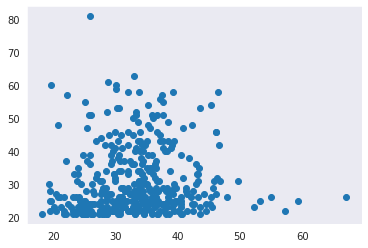

In [28]:
plt.scatter(dia['BMI'], dia['Age'])


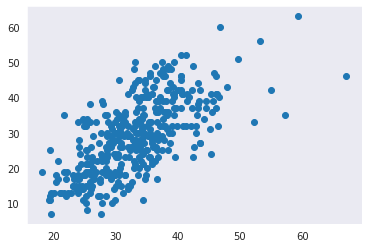

In [29]:
plt.scatter(dia['BMI'], dia['SkinThickness'])


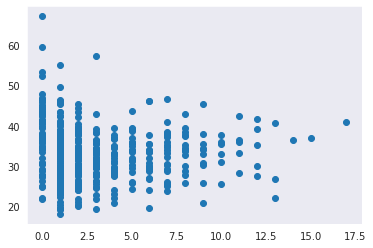

In [ ]:
plt.scatter(dia['Pregnancies'], dia['BMI'])


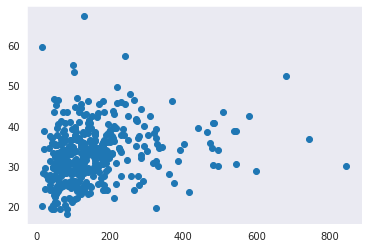

In [32]:
plt.scatter(dia['Insulin'], dia['BMI'])


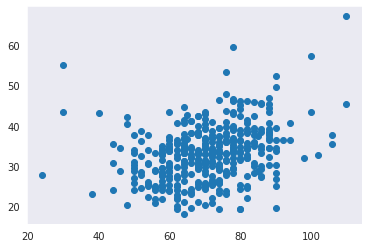

In [33]:
plt.scatter(dia['BloodPressure'], dia['BMI'])


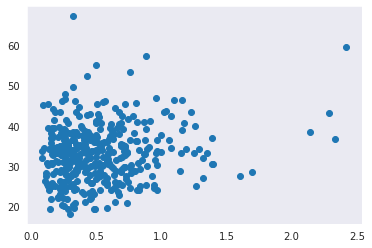

In [35]:
plt.scatter(dia['DiabetesPedigreeFunction'], dia['BMI'])


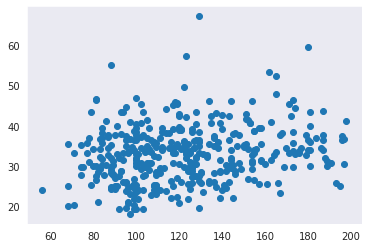

In [34]:
plt.scatter(dia['Glucose'], dia['BMI'])


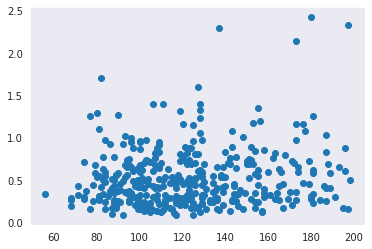

In [37]:
plt.scatter(dia['Glucose'], dia['DiabetesPedigreeFunction'])


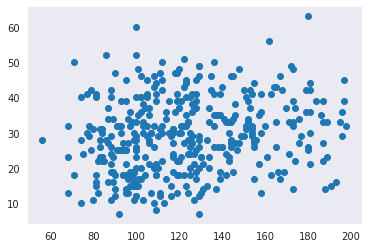

In [42]:
plt.scatter(dia['Glucose'], dia['SkinThickness'])


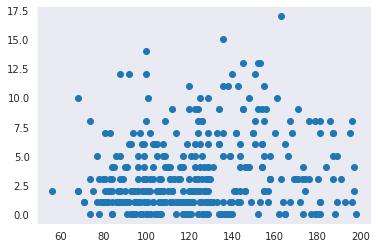

In [41]:
plt.scatter(dia['Glucose'], dia['Pregnancies'])


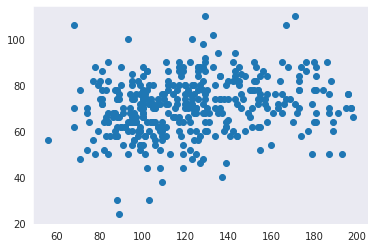

In [40]:
plt.scatter(dia['Glucose'], dia['BloodPressure'])


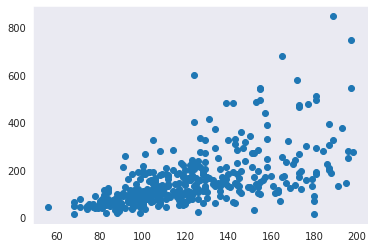

In [39]:
plt.scatter(dia['Glucose'], dia['Insulin'])


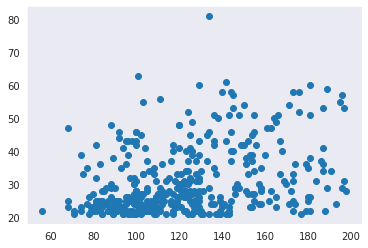

In [38]:
plt.scatter(dia['Glucose'], dia['Age'])


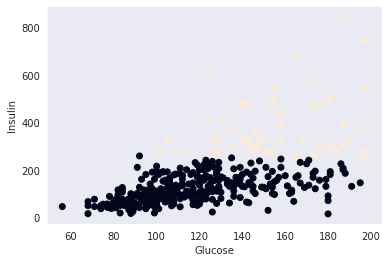

In [45]:
# data1 create
data1 = dia.loc[:, ['Glucose', 'Insulin']]
# KMEANS 1
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(data1)
labels1 = kmeans1.predict(data1)

# visualization
plt.scatter(dia['Glucose'], dia['Insulin'], c = labels1)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

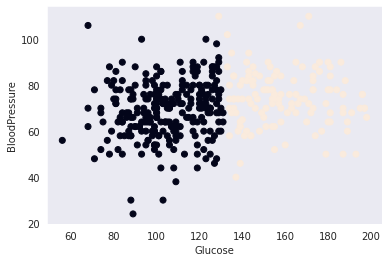

In [46]:
# data2 create
data2 = dia.loc[:, ['Glucose', 'BloodPressure']]
# KMEANS 2
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(data2)
labels2 = kmeans2.predict(data2)

# visualization
plt.scatter(dia['Glucose'], dia['BloodPressure'], c = labels2)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

In [48]:
df = pd.DataFrame({'labels':labels2, 'Outcome':dia['Outcome']})
crosstab = pd.crosstab(df['labels'],df['Outcome'])
crosstab

Outcome,0,1
labels,,
0,215,46
1,47,84


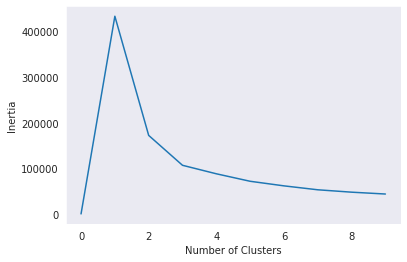

In [49]:
iner_list = np.empty(10)
for i in range(1,10):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(data2)
    iner_list[i] = kmeans2.inertia_

# iner_list = iner_list%100
# show the best number in graph
plt.plot(range(0,10), iner_list,'-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [51]:
data3 = dia.drop('Outcome', axis = 1)
data3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59
...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26
755,1,128,88,39,110,36.5,1.057,37
760,2,88,58,26,16,28.4,0.766,22
763,10,101,76,48,180,32.9,0.171,63


In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

sscaler = StandardScaler()
kmeans2 = KMeans(n_clusters=4)
pipeline = make_pipeline(sscaler, kmeans2)
pipeline.fit(data3)

# cross table
labels = pipeline.predict(data3)
df = pd.DataFrame({'labels':labels, 'Outcome':dia['Outcome']})
crosstab = pd.crosstab(df['labels'], df['Outcome'])
crosstab

Outcome,0,1
labels,,
0,34,42
1,68,41
2,145,16
3,15,31


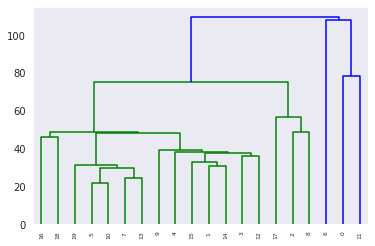

In [54]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data3.iloc[200:220,:],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

In [55]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2, affinity="euclidean",linkage="ward")
cluster = hc.fit_predict(data3)
data3['Label'] = cluster
data3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,0
13,1,189,60,23,846,30.1,0.398,59,0
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,0
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,1
763,10,101,76,48,180,32.9,0.171,63,0


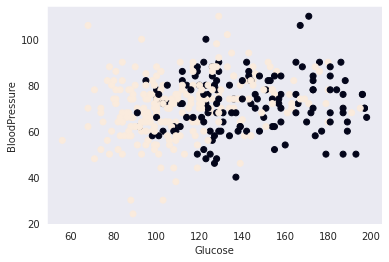

In [56]:
plt.scatter(data3['Glucose'], data3['BloodPressure'], c = cluster)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

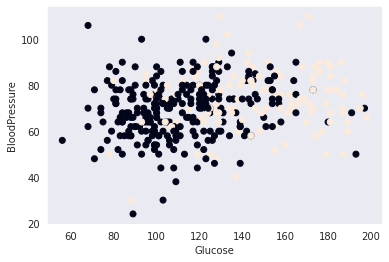

In [58]:
plt.scatter(dia['Glucose'], dia['BloodPressure'], c = dia['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

In [59]:
data3['Outcome'] = dia['Outcome']
data3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label,Outcome
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,0,1
6,3,78,50,32,88,31.0,0.248,26,1,1
8,2,197,70,45,543,30.5,0.158,53,0,1
13,1,189,60,23,846,30.1,0.398,59,0,1
...,...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,0,1
755,1,128,88,39,110,36.5,1.057,37,1,1
760,2,88,58,26,16,28.4,0.766,22,1,0
763,10,101,76,48,180,32.9,0.171,63,0,0
